In [201]:
# “what sorts of people were more likely to survive?”
#using passenger data (ie name, age, gender, socio-economic class, etc).

#Base de dados

In [213]:
import pandas as pd
base = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

base.head()
#Já observamos com os dados que é interessante trabalhar com o Pclass, sex, Age, Cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [214]:
base.info()
#891 linhas e 12 colunas
(base.isnull().sum()/base.shape[0]*100).sort_values(ascending=False).head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Name,0.000000


In [215]:
#Ver onde temos valores nulos no test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Text(0.5, 1.0, 'Distribuição das idades')

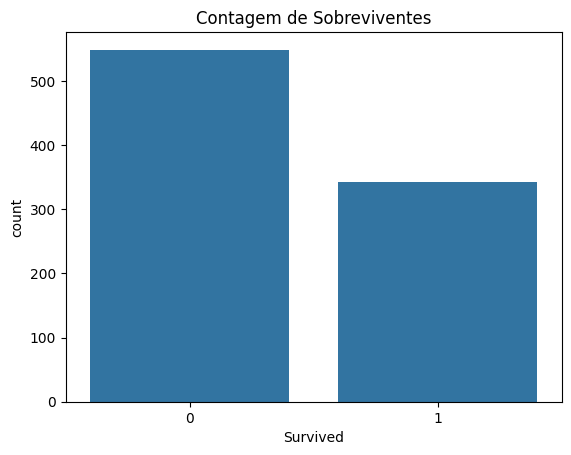

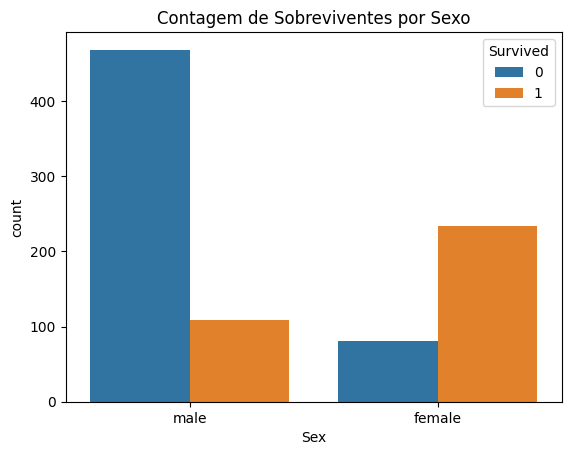

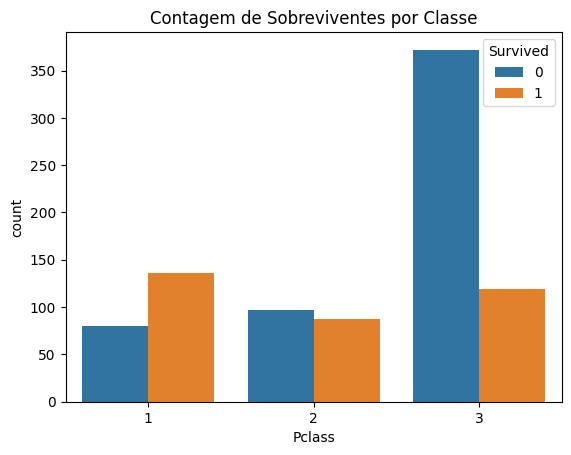

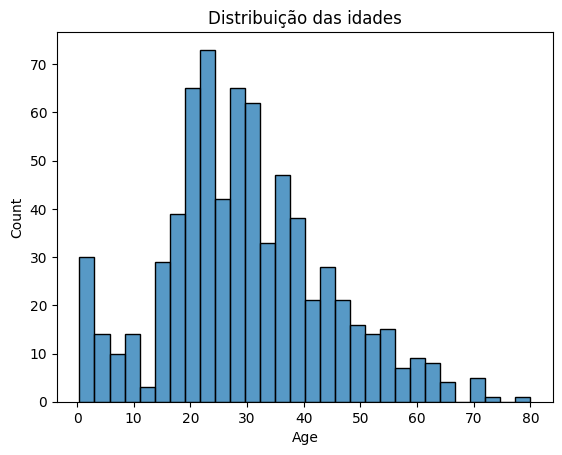

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot 1: Numero de sobreviventes
plt.figure()
sns.countplot(x='Survived', data= base)
plt.title('Contagem de Sobreviventes')

# Plot 2: Sobreviventes por sexo
plt.figure() # Careate another new figure
sns.countplot(x='Sex', hue='Survived', data= base)
plt.title('Contagem de Sobreviventes por Sexo')

# Plot 3: Sobreviventes por Classe economica
plt.figure() # Create a third new figure
sns.countplot(x='Pclass', hue='Survived', data= base)
plt.title('Contagem de Sobreviventes por Classe')

#Plot 4: Histograma das idades
plt.figure()
sns.histplot(base['Age'], bins=30)
plt.title('Distribuição das idades')

# Limpeza e tratamento de dados

In [217]:
#Utilizar somente a que seção do navio a cabine está presente para ver se está perto de botes
base['CabinLetter'] = base['Cabin'].str[0]
test['CabinLetter'] = test['Cabin'].str[0]

In [218]:
#Colocando a mediana nos valores desconhecidos assim não alteramos signficamente as metricas
base['Age'].fillna(base['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

test['Fare'].fillna(test['Fare'].median(), inplace=True)

print(test.columns)

base['Embarked'].fillna('Unknown', inplace=True)
test['Embarked_Unknown'] = False

base['CabinLetter'].fillna('U', inplace=True) #Unknown
test['CabinLetter_U'] = False

#Eliminar colunas sem utilidade
eliminar = ['Name', 'Ticket', 'Cabin']

# Crie listas de colunas a serem removidas para base e test
columns_to_drop_base = [col for col in eliminar if col in base.columns]
columns_to_drop_test = [col for col in eliminar if col in test.columns]

# Remova as colunas de cada DataFrame
base = base.drop(columns=columns_to_drop_base, axis=1)
test = test.drop(columns=columns_to_drop_test, axis=1)


base.head()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'CabinLetter'],
      dtype='object')


<ipython-input-218-354bc3ca1ad0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base['Age'].fillna(base['Age'].median(), inplace=True)
<ipython-input-218-354bc3ca1ad0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter
0,1,0,3,male,22.0,1,0,7.2500,S,U
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,S,U
3,4,1,1,female,35.0,1,0,53.1000,S,C
4,5,0,3,male,35.0,0,0,8.0500,S,U


In [219]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter,Embarked_Unknown,CabinLetter_U
0,892,3,male,34.5,0,0,7.8292,Q,NaN,False,False
1,893,3,female,47.0,1,0,7.0000,S,NaN,False,False
2,894,2,male,62.0,0,0,9.6875,Q,NaN,False,False
3,895,3,male,27.0,0,0,8.6625,S,NaN,False,False
4,896,3,female,22.0,1,1,12.2875,S,NaN,False,False


In [220]:
#Converter variáveis categoricas em numeros
#Modelo precisa interpretar sem assumir ordens falsas (One-Hot Encoding)
base2 = pd.get_dummies(base, columns=['Sex','Embarked', 'CabinLetter'])
test2 = pd.get_dummies(test, columns=['Sex', 'Embarked', 'CabinLetter'])

# Obter todas as colunas após get_dummies
all_columns = list(set(base2.columns) | set(test2.columns))

# Reindexar test2 para ter as mesmas colunas que base2 (e adicionar colunas ausentes com 0s)
test2 = test2.reindex(columns=all_columns, fill_value= False)

# Reindexar base2 para ter as mesmas colunas que test2 (e adicionar colunas ausentes com 0s),
# garantindo que a ordem das colunas seja a mesma
base2 = base2.reindex(columns=all_columns, fill_value= False)


base2.head()

,PassengerId,Sex_female,Fare,CabinLetter_G,Pclass,SibSp,Parch,CabinLetter_B,CabinLetter_A,Embarked_S,...,Embarked_Q,CabinLetter_U,Embarked_Unknown,CabinLetter_F,CabinLetter_C,Age,CabinLetter_D,Survived,Embarked_C,CabinLetter_T
0,1,False,7.2500,False,3,1,0,False,False,True,...,False,True,False,False,False,22.0,False,0,False,False
1,2,True,71.2833,False,1,1,0,False,False,False,...,False,False,False,False,True,38.0,False,1,True,False
2,3,True,7.9250,False,3,0,0,False,False,True,...,False,True,False,False,False,26.0,False,1,False,False
3,4,True,53.1000,False,1,1,0,False,False,True,...,False,False,False,False,True,35.0,False,1,False,False
4,5,False,8.0500,False,3,0,0,False,False,True,...,False,True,False,False,False,35.0,False,0,False,False


#Engenharia de Features

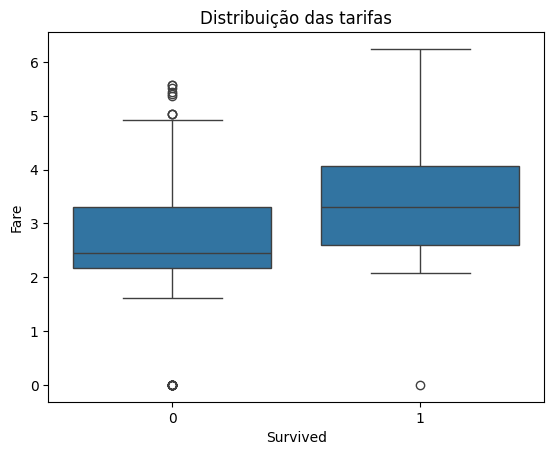

<function matplotlib.pyplot.show(close=None, block=None)>

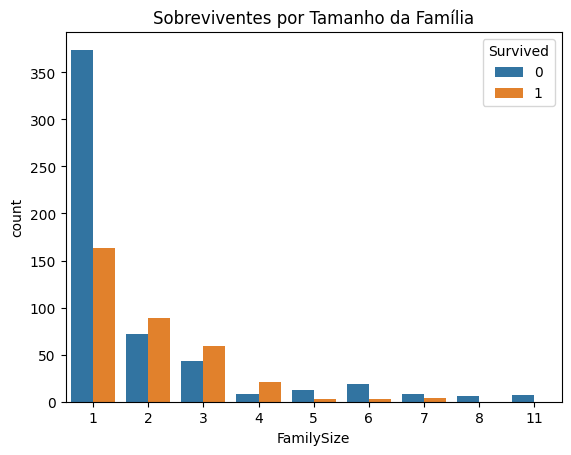

In [221]:
#Criar novas variáveis
base2['FamilySize']= base2['SibSp'] + base['Parch'] + 1
test2['FamilySize']= test['SibSp'] + test['Parch'] + 1

import numpy as np
base2_for_plot = base2.copy()
base2_for_plot['Fare'] = np.log1p(base2_for_plot['Fare'])
sns.boxplot(x='Survived', y='Fare', data=base2_for_plot)
plt.title('Distribuição das tarifas')
plt.show()

sns.countplot(x='FamilySize', hue='Survived', data =base2)
plt.title('Sobreviventes por Tamanho da Família')
plt.show

#Depois tentar dividir Family Size e fare em 3 divisões

In [223]:
#Adicionando coluna Alone na base
base2['Alone'] = (base2['FamilySize'] ==1).astype(int)
test2['Alone'] = (test2['FamilySize'] ==1).astype(int)

base2.head()

,PassengerId,Sex_female,Fare,CabinLetter_G,Pclass,SibSp,Parch,CabinLetter_B,CabinLetter_A,Embarked_S,...,Embarked_Unknown,CabinLetter_F,CabinLetter_C,Age,CabinLetter_D,Survived,Embarked_C,CabinLetter_T,FamilySize,Alone
0,1,False,7.2500,False,3,1,0,False,False,True,...,False,False,False,22.0,False,0,False,False,2,0
1,2,True,71.2833,False,1,1,0,False,False,False,...,False,False,True,38.0,False,1,True,False,2,0
2,3,True,7.9250,False,3,0,0,False,False,True,...,False,False,False,26.0,False,1,False,False,1,1
3,4,True,53.1000,False,1,1,0,False,False,True,...,False,False,True,35.0,False,1,False,False,2,0
4,5,False,8.0500,False,3,0,0,False,False,True,...,False,False,False,35.0,False,0,False,False,1,1


In [224]:
test2.head()


,PassengerId,Sex_female,Fare,CabinLetter_G,Pclass,SibSp,Parch,CabinLetter_B,CabinLetter_A,Embarked_S,...,Embarked_Unknown,CabinLetter_F,CabinLetter_C,Age,CabinLetter_D,Survived,Embarked_C,CabinLetter_T,FamilySize,Alone
0,892,False,7.8292,False,3,0,0,False,False,False,...,False,False,False,34.5,False,False,False,False,1,1
1,893,True,7.0000,False,3,1,0,False,False,True,...,False,False,False,47.0,False,False,False,False,2,0
2,894,False,9.6875,False,2,0,0,False,False,False,...,False,False,False,62.0,False,False,False,False,1,1
3,895,False,8.6625,False,3,0,0,False,False,True,...,False,False,False,27.0,False,False,False,False,1,1
4,896,True,12.2875,False,3,1,1,False,False,True,...,False,False,False,22.0,False,False,False,False,3,0


#Separar os dados e Treinar o modelo

In [225]:
#Separar os dados
# Use the DataFrame after one-hot encoding (base2) for the features
X = base2.drop(['Survived', 'PassengerId'], axis=1)
y = base2['Survived']

#Treinar o modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Treinando o modelo
model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nAvaliacao das métricas:\n", classification_report(y_val, y_pred))
print("\nMatriz de confusão:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.8100558659217877

Avaliacao das métricas:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Matriz de confusão:
 [[92 13]
 [21 53]]


In [229]:
# Separar os dados
# Use the DataFrame after one-hot encoding (base2) for the features
X = base2.drop(['Survived', 'PassengerId'], axis=1)
y = base2['Survived']

# Treinar o modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np # Import numpy

# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred_val = model.predict(X_val) # Renamed for clarity

print("Accuracy:", accuracy_score(y_val, y_pred_val)) # Use y_pred_val for validation
print("\nAvaliacao das métricas:\n", classification_report(y_val, y_pred_val)) # Use y_pred_val
print("\nMatriz de confusão:\n", confusion_matrix(y_val, y_pred_val)) # Use y_pred_val


# Create the test features DataFrame, ensuring it has the same columns as X
X_test = test2.drop(['PassengerId'], axis=1, errors='ignore') # Drop PassengerId and handle if Survived exists
# Ensure X_test has the same columns as X and in the same order
missing_cols = set(X.columns) - set(X_test.columns)
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of columns is the same
X_test = X_test[X.columns]


y_pred_test = model.predict(X_test) # Predict on the test set

# Nova Coluna com a previsão no test2 DataFrame
test2['Survived'] = y_pred_test # Assign predictions from the test set

# Extrair somente o ID e o Survived (predicted)
# We can use test2 directly as it now contains the predicted 'Survived' column
resultado = test2[['PassengerId', 'Survived']]

resultado.to_csv('titanic_sobreviventes.csv', index=False) # Index False para nao vir com coluna 0 inicial

Accuracy: 0.8044692737430168

Avaliacao das métricas:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Matriz de confusão:
 [[92 13]
 [22 52]]


In [ ]:
#Checar numero de colunas
resultado.shape